# Which factors have historically had the greatest impact on teams that have won the World Series?
## In other words, which factors have correlated most stongly with a team's success in the World Series?

This project seeks to explore the outcomes that have had the strongest correlation to success in the postseason, in particular in the World Series.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

batting_post = pd.read_csv('BattingPost.csv')
batting_post.head()


,yearID,round,playerID,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1957,WS,aaronha01,ML1,NL,7,28,5,11,0,...,7,0,0.0,1,6,0,0.0,0.0,0.0,0.0
1,1958,WS,aaronha01,ML1,NL,7,27,3,9,2,...,2,0,0.0,4,6,0,0.0,0.0,0.0,1.0
2,1969,NLCS,aaronha01,ATL,NL,3,14,3,5,2,...,7,0,0.0,0,1,0,0.0,0.0,0.0,1.0
3,1969,NLCS,aaronto01,ATL,NL,1,1,0,0,0,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0
4,1979,ALCS,aasedo01,CAL,AL,2,0,0,0,0,...,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0


In [3]:
pitching_post = pd.read_csv('PitchingPost.csv')
pitching_post.head()

,playerID,yearID,round,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aasedo01,1979,ALCS,CAL,AL,1,0,2,0,0,...,1.0,0.0,0.0,0.0,20.0,2,1,0.0,1.0,0.0
1,abadfe01,2014,ALWC,OAK,AL,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,0.0,0.0
2,abbotgl01,1975,ALCS,OAK,AL,0,0,1,0,0,...,0.0,0.0,0.0,0.0,3.0,1,0,0.0,0.0,0.0
3,abbotpa01,2000,ALCS,SEA,AL,0,1,1,1,0,...,0.0,0.0,0.0,0.0,21.0,0,3,0.0,0.0,0.0
4,abbotpa01,2000,ALDS2,SEA,AL,1,0,1,1,0,...,0.0,0.0,1.0,0.0,25.0,0,2,0.0,1.0,1.0


In [4]:
fielding_post = pd.read_csv('FieldingPost.csv')
fielding_post.head()

,playerID,yearID,teamID,lgID,round,POS,G,GS,InnOuts,PO,A,E,DP,TP,PB,SB,CS
0,aaronha01,1957,ML1,NL,WS,CF,7,7,186,11,0,0,0,0.0,NaN,NaN,NaN
1,aaronha01,1958,ML1,NL,WS,CF,1,1,21,2,0,0,0,0.0,NaN,NaN,NaN
2,aaronha01,1958,ML1,NL,WS,RF,7,6,168,13,0,0,0,0.0,NaN,NaN,NaN
3,aaronha01,1969,ATL,NL,NLCS,RF,3,3,78,5,1,0,0,0.0,NaN,NaN,NaN
4,aasedo01,1979,CAL,AL,ALCS,P,2,0,15,0,1,0,0,0.0,NaN,NaN,NaN


In [5]:
series_post = pd.read_csv('SeriesPost.csv')
series_post.head()

,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
0,1884,WS,PRO,NL,NY4,AA,3,0,0
1,1885,WS,CHN,NL,SL4,AA,3,3,1
2,1886,WS,SL4,AA,CHN,NL,4,2,0
3,1887,WS,DTN,NL,SL4,AA,10,5,0
4,1888,WS,NY1,NL,SL4,AA,6,4,0


In [6]:
world_series = series_post[(series_post['round']=='WS') & (series_post['yearID']>= 1903)]
world_series.sort_values('losses')

,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
67,1963,WS,LAN,NL,NYA,AL,4,0,0
43,1939,WS,NYA,AL,CIN,NL,4,0,0
42,1938,WS,NYA,AL,CHN,NL,4,0,0
54,1950,WS,NYA,AL,PHI,NL,4,0,0
58,1954,WS,NY1,NL,CLE,AL,4,0,0
...,...,...,...,...,...,...,...,...,...
130,1986,WS,NYN,NL,BOS,AL,4,3,0
133,1987,WS,MIN,AL,SLN,NL,4,3,0
25,1921,WS,NY1,NL,NYA,AL,5,3,0
71,1967,WS,SLN,NL,BOS,AL,4,3,0


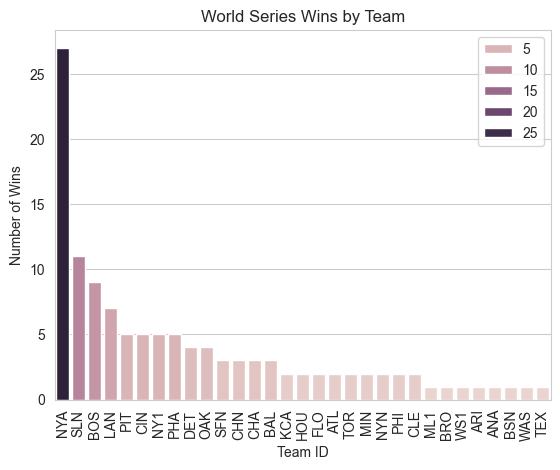

In [7]:

winner_counts = world_series['teamIDwinner'].value_counts()

sns.set_style('whitegrid')
sns.set_palette("Spectral")


sns.barplot(x=winner_counts.index, y=winner_counts.values, hue = winner_counts.values)
plt.xticks(rotation=90)
plt.title('World Series Wins by Team')
plt.xlabel('Team ID')
plt.ylabel('Number of Wins')
plt.show()



In [8]:
# what kinds of data are in each set
batting_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17360 entries, 0 to 17359
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   yearID    17360 non-null  int64  
 1   round     17360 non-null  object 
 2   playerID  17360 non-null  object 
 3   teamID    17360 non-null  object 
 4   lgID      17360 non-null  object 
 5   G         17360 non-null  int64  
 6   AB        17360 non-null  int64  
 7   R         17360 non-null  int64  
 8   H         17360 non-null  int64  
 9   2B        17360 non-null  int64  
 10  3B        17360 non-null  int64  
 11  HR        17360 non-null  int64  
 12  RBI       17360 non-null  int64  
 13  SB        17360 non-null  int64  
 14  CS        17159 non-null  float64
 15  BB        17360 non-null  int64  
 16  SO        17360 non-null  int64  
 17  IBB       17360 non-null  int64  
 18  HBP       17159 non-null  float64
 19  SH        17159 non-null  float64
 20  SF        17159 non-null  fl

In [9]:
# some descriptive adata from each column in the hitters dataset
batting_post.describe()

,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,17360.000000,17360.000000,17360.000000,17360.000000,17360.000000,17360.000000,17360.000000,17360.000000,17360.000000,17360.000000,17159.000000,17360.000000,17360.000000,17360.000000,17159.000000,17159.000000,17159.000000,17159.000000
mean,1993.232258,3.024021,7.312442,0.875230,1.759274,0.308525,0.041129,0.197408,0.817800,0.135541,0.058337,0.698099,1.505991,0.072293,0.064456,0.086019,0.045807,0.138003
std,30.003834,1.842759,8.614843,1.479739,2.523294,0.681132,0.216896,0.539605,1.542693,0.533571,0.268027,1.271279,2.044854,0.326832,0.274272,0.332159,0.224659,0.405638
min,1884.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2002.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,4.000000,14.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,15.000000,66.000000,13.000000,21.000000,6.000000,4.000000,6.000000,13.000000,15.000000,5.000000,13.000000,17.000000,7.000000,4.000000,5.000000,3.000000,5.000000


In [10]:
# some descriptve data from each column in the pitchers dataset
pitching_post.describe()

,yearID,W,L,G,GS,CG,SHO,SV,IPouts,H,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,...,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6991.000000,6991.000000,6941.000000,6941.000000,6941.000000
mean,1996.374052,0.269346,0.269346,1.903018,0.540409,0.094550,0.020455,0.104706,14.501931,4.368617,...,0.180810,0.143207,0.159343,0.011382,19.875666,0.445859,2.174224,0.212649,0.113240,0.341305
std,27.723788,0.528964,0.507430,1.015632,0.769625,0.415456,0.148466,0.406555,14.055519,4.406054,...,0.459307,0.410182,0.416477,0.106084,17.306075,0.807623,2.596680,0.545103,0.345618,0.654011
min,1884.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1986.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2005.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2016.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,19.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,26.000000,1.000000,3.000000,0.000000,0.000000,1.000000
max,2024.000000,4.000000,4.000000,8.000000,8.000000,8.000000,3.000000,4.000000,213.000000,64.000000,...,4.000000,5.000000,4.000000,1.000000,178.000000,6.000000,36.000000,7.000000,3.000000,6.000000


In [11]:
# some descriptive statistics for the fielders dataset
fielding_post.describe()

,yearID,G,GS,InnOuts,PO,A,E,DP,TP,PB,SB,CS
count,16502.000000,16502.000000,16502.000000,16502.000000,16502.000000,16502.000000,16502.000000,16502.000000,16039.000000,1266.000000,64.000000,64.000000
mean,1994.984426,2.823840,1.991698,53.558781,5.950976,2.183978,0.161920,0.477760,0.000249,0.213270,1.828125,0.328125
std,27.768329,1.782163,2.149464,55.369045,10.842726,4.312988,0.482865,1.190669,0.015791,0.530804,2.236456,0.564975
min,1903.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1983.000000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2003.000000,2.000000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2016.000000,4.000000,4.000000,93.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.250000,1.000000
max,2024.000000,8.000000,8.000000,222.000000,91.000000,33.000000,8.000000,13.000000,1.000000,5.000000,9.000000,2.000000


In [12]:
# lastly, some descriptive statistics for the series dataset
series_post.describe()

,yearID,wins,losses,ties
count,400.000000,400.000000,400.000000,400.000000
mean,1990.400000,3.405000,1.317500,0.007500
std,33.018336,0.879151,1.099872,0.086385
min,1884.000000,1.000000,0.000000,0.000000
25%,1977.750000,3.000000,0.000000,0.000000
50%,2001.000000,4.000000,1.000000,0.000000
75%,2015.000000,4.000000,2.000000,0.000000
max,2024.000000,10.000000,5.000000,1.000000


In [13]:
series_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   yearID        400 non-null    int64 
 1   round         400 non-null    object
 2   teamIDwinner  400 non-null    object
 3   lgIDwinner    400 non-null    object
 4   teamIDloser   400 non-null    object
 5   lgIDloser     400 non-null    object
 6   wins          400 non-null    int64 
 7   losses        400 non-null    int64 
 8   ties          400 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 28.3+ KB


In [14]:
# value counts for the the object columns in the series dataset

for column in series_post.select_dtypes(include=['object']).columns:
    print(f'{column}')
    print(series_post[column].value_counts())
    print('')

round
round
WS       127
ALCS      55
NLCS      55
ALDS1     30
NLDS1     30
ALDS2     30
NLDS2     30
ALWC       9
NLWC       9
ALWC1      4
ALWC2      4
NLWC1      4
NLWC2      4
NEDIV      1
AWDIV      1
NWDIV      1
AEDIV      1
CS         1
ALWC3      1
ALWC4      1
NLWC3      1
NLWC4      1
Name: count, dtype: int64

teamIDwinner
teamIDwinner
NYA    57
SLN    30
LAN    28
BOS    24
HOU    18
ATL    17
PHI    15
SFN    14
OAK    13
NYN    13
CLE    12
DET    12
BAL    12
CIN    11
CHN    10
KCA    10
PIT     8
TEX     8
ARI     8
SDN     7
TOR     7
TBA     7
NY1     7
MIN     6
FLO     6
PHA     5
CHA     5
SEA     4
WAS     4
COL     3
ANA     3
LAA     2
BSN     2
BRO     2
MIL     2
PRO     1
ML4     1
MON     1
ML1     1
WS1     1
DTN     1
SL4     1
MIA     1
Name: count, dtype: int64

lgIDwinner
lgIDwinner
AL    203
NL    196
AA      1
Name: count, dtype: int64

teamIDloser
teamIDloser
NYA    32
ATL    24
LAN    22
SLN    21
CHN    19
OAK    17
HOU    16
BOS    16
PHI    15

## Batting statistics

Let's explore some data about batting in the postseason. We'll start by cleaning the data first. 

In [15]:
# Checking out what kind of data is in the batting postseason dataset
batting_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17360 entries, 0 to 17359
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   yearID    17360 non-null  int64  
 1   round     17360 non-null  object 
 2   playerID  17360 non-null  object 
 3   teamID    17360 non-null  object 
 4   lgID      17360 non-null  object 
 5   G         17360 non-null  int64  
 6   AB        17360 non-null  int64  
 7   R         17360 non-null  int64  
 8   H         17360 non-null  int64  
 9   2B        17360 non-null  int64  
 10  3B        17360 non-null  int64  
 11  HR        17360 non-null  int64  
 12  RBI       17360 non-null  int64  
 13  SB        17360 non-null  int64  
 14  CS        17159 non-null  float64
 15  BB        17360 non-null  int64  
 16  SO        17360 non-null  int64  
 17  IBB       17360 non-null  int64  
 18  HBP       17159 non-null  float64
 19  SH        17159 non-null  float64
 20  SF        17159 non-null  fl

In [16]:
# check for missing values in the batting postseason dataset
batting_post.isna().sum()

yearID        0
round         0
playerID      0
teamID        0
lgID          0
G             0
AB            0
R             0
H             0
2B            0
3B            0
HR            0
RBI           0
SB            0
CS          201
BB            0
SO            0
IBB           0
HBP         201
SH          201
SF          201
GIDP        201
dtype: int64

In [17]:
batting_post[(batting_post['CS'].isna()) | (batting_post['HBP'].isna()) | (batting_post['GIDP'].isna()) | batting_post['SH'].isna()| (batting_post['SF'].isna())][[
    'playerID', 'yearID', 'CS', 'HBP', 'SH', 'SF', 'GIDP'
]]

,playerID,yearID,CS,HBP,SH,SF,GIDP
402,ansonca01,1885,NaN,NaN,NaN,NaN,NaN
403,ansonca01,1886,NaN,NaN,NaN,NaN,NaN
715,baldwla01,1887,NaN,NaN,NaN,NaN,NaN
759,barklsa01,1885,NaN,NaN,NaN,NaN,NaN
901,becanbu01,1884,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
16887,willine01,1885,NaN,NaN,NaN,NaN,NaN
16888,willine01,1886,NaN,NaN,NaN,NaN,NaN
17043,wolfji01,1890,NaN,NaN,NaN,NaN,NaN
17239,youngcy01,1892,NaN,NaN,NaN,NaN,NaN


In [18]:
# Next we'll see how to handle the missing values in the batting dataset. Should they get dropped? 
len(batting_post)
threshold = 0.05 * len(batting_post)
threshold

# Since all columns have substantially less than 5% missing values, we can drop the rows with missing data. 
# Select the columns to drop:
columns_to_drop = batting_post.columns[batting_post.isna().sum() <= threshold]
batting_post.dropna(subset = columns_to_drop, inplace=True)
batting_post.isna().sum()

yearID      0
round       0
playerID    0
teamID      0
lgID        0
G           0
AB          0
R           0
H           0
2B          0
3B          0
HR          0
RBI         0
SB          0
CS          0
BB          0
SO          0
IBB         0
HBP         0
SH          0
SF          0
GIDP        0
dtype: int64

In [19]:
#Now that there are no more missing values in the batting postseason dataset
batting_post.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17159 entries, 0 to 17359
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   yearID    17159 non-null  int64  
 1   round     17159 non-null  object 
 2   playerID  17159 non-null  object 
 3   teamID    17159 non-null  object 
 4   lgID      17159 non-null  object 
 5   G         17159 non-null  int64  
 6   AB        17159 non-null  int64  
 7   R         17159 non-null  int64  
 8   H         17159 non-null  int64  
 9   2B        17159 non-null  int64  
 10  3B        17159 non-null  int64  
 11  HR        17159 non-null  int64  
 12  RBI       17159 non-null  int64  
 13  SB        17159 non-null  int64  
 14  CS        17159 non-null  float64
 15  BB        17159 non-null  int64  
 16  SO        17159 non-null  int64  
 17  IBB       17159 non-null  int64  
 18  HBP       17159 non-null  float64
 19  SH        17159 non-null  float64
 20  SF        17159 non-null  float64

In [20]:
# There are values that should be integers that are currently floats. Let's convert them.
int_columns = ['CS', 'GIDP', 'HBP', 'SH', 'SF']
batting_post[int_columns] = batting_post[int_columns].astype(int)
batting_post.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17159 entries, 0 to 17359
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   yearID    17159 non-null  int64 
 1   round     17159 non-null  object
 2   playerID  17159 non-null  object
 3   teamID    17159 non-null  object
 4   lgID      17159 non-null  object
 5   G         17159 non-null  int64 
 6   AB        17159 non-null  int64 
 7   R         17159 non-null  int64 
 8   H         17159 non-null  int64 
 9   2B        17159 non-null  int64 
 10  3B        17159 non-null  int64 
 11  HR        17159 non-null  int64 
 12  RBI       17159 non-null  int64 
 13  SB        17159 non-null  int64 
 14  CS        17159 non-null  int64 
 15  BB        17159 non-null  int64 
 16  SO        17159 non-null  int64 
 17  IBB       17159 non-null  int64 
 18  HBP       17159 non-null  int64 
 19  SH        17159 non-null  int64 
 20  SF        17159 non-null  int64 
 21  GIDP      17159 n

## We have 'clean' data now!

We're going to have to do the same thing with pitching, defense, and the series data. For now, let's pause and have some fun!

In [21]:
# We need to add some clumns to the dataset to make it easier to analyze. Let's add a column for On-Base Percentage (OBP) and Slugging Percentage (SLG).
batting_post['AVG'] = (batting_post['H'] / batting_post['AB']).round(3)
batting_post['OBP'] = ((batting_post['H'] + batting_post['BB'] + batting_post['HBP']) / (batting_post['AB'] + batting_post['BB'] + batting_post['HBP'] + batting_post['SF'])).round(3)
batting_post['SLG'] = ((batting_post['H'] + (2 * batting_post['2B']) + (3 * batting_post['3B']) + (4 * batting_post['HR'])) / batting_post['AB']).round(3)
batting_post['OPS'] = (batting_post['OBP'] + batting_post['SLG'])
batting_post[['playerID', 'yearID', 'AVG', 'OBP', 'SLG', 'OPS']].head()

,playerID,yearID,AVG,OBP,SLG,OPS
0,aaronha01,1957,0.393,0.414,0.929,1.343
1,aaronha01,1958,0.333,0.419,0.481,0.900
2,aaronha01,1969,0.357,0.357,1.500,1.857
3,aaronto01,1969,0.000,0.000,0.000,0.000
4,aasedo01,1979,NaN,NaN,NaN,NaN


In [22]:
# I'm seeing some NaN values again, let's see if they can be fixed.
batting_post.isna().sum()

yearID         0
round          0
playerID       0
teamID         0
lgID           0
G              0
AB             0
R              0
H              0
2B             0
3B             0
HR             0
RBI            0
SB             0
CS             0
BB             0
SO             0
IBB            0
HBP            0
SH             0
SF             0
GIDP           0
AVG         5717
OBP         5610
SLG         5717
OPS         5717
dtype: int64

In [23]:
# Now there are new NaN values in the AVG, OBP, SLG, and OPS columns. Let's see if it's the hits that are the source of the NaN values.
batting_post[batting_post['AB'] == 0][['playerID', 'yearID', 'AB', 'AVG', 'OBP', 'SLG', 'OPS']]

,playerID,yearID,AB,AVG,OBP,SLG,OPS
4,aasedo01,1979,0,NaN,NaN,NaN,NaN
5,abadfe01,2014,0,NaN,NaN,NaN,NaN
7,abbotgl01,1975,0,NaN,NaN,NaN,NaN
15,abbotpa01,2000,0,NaN,NaN,NaN,NaN
16,abbotpa01,2000,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
17332,zitoba01,2006,0,NaN,NaN,NaN,NaN
17351,zuberbi01,1946,0,NaN,NaN,NaN,NaN
17352,zumayjo01,2006,0,NaN,NaN,NaN,NaN
17353,zumayjo01,2006,0,NaN,NaN,NaN,NaN


In [24]:
batting_post[(batting_post['AB'] != 0) & (batting_post['AVG'].isna())][['playerID', 'yearID', 'AB', 'AVG', 'OBP', 'SLG', 'OPS']]

,playerID,yearID,AB,AVG,OBP,SLG,OPS


In [25]:
# I think it's safe to conclude that AB == 0 is the source of the NaN values.
# Let's fill those values as zeroes since they would necessarily have an AVG, OBP, SLG, and OPS of 0.
batting_post['AVG'].fillna(0.000, inplace=True)
batting_post['OBP'].fillna(0.000, inplace=True)
batting_post['SLG'].fillna(0.000, inplace=True)
batting_post['OPS'].fillna(0.000, inplace=True)
batting_post[['playerID', 'yearID', 'AB', 'AVG', 'OBP', 'SLG', 'OPS']].head(10)

/var/folders/kz/2037kb4n7zg50nhsp_pgt59h0000gn/T/ipykernel_39208/3919626977.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  batting_post['AVG'].fillna(0.000, inplace=True)
/var/folders/kz/2037kb4n7zg50nhsp_pgt59h0000gn/T/ipykernel_39208/3919626977.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

,playerID,yearID,AB,AVG,OBP,SLG,OPS
0,aaronha01,1957,28,0.393,0.414,0.929,1.343
1,aaronha01,1958,27,0.333,0.419,0.481,0.900
2,aaronha01,1969,14,0.357,0.357,1.500,1.857
3,aaronto01,1969,1,0.000,0.000,0.000,0.000
4,aasedo01,1979,0,0.000,0.000,0.000,0.000
5,abadfe01,2014,0,0.000,0.000,0.000,0.000
6,abbated01,1909,1,0.000,0.000,0.000,0.000
7,abbotgl01,1975,0,0.000,0.000,0.000,0.000
8,abbotje01,2000,1,0.000,0.000,0.000,0.000
9,abbotku01,1997,8,0.375,0.375,0.625,1.000


In [26]:
# Now let's take a look at team stats. We'll need to aggregate the player stats by team and year.
stats_to_sum = ['AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'HBP', 'SH', 'SF', 'GIDP']
team_batting_post = batting_post.groupby(['teamID', 'yearID'])[stats_to_sum].sum().reset_index()
team_batting_post.head()

,teamID,yearID,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,HBP,SH,SF,GIDP
0,ANA,2002,565,101,181,30,3,24,95,11,2,39,82,6,8,5,13
1,ANA,2004,106,12,24,3,0,4,12,1,1,11,28,2,1,0,0
2,ARI,1999,126,16,26,7,1,4,16,0,1,14,22,3,0,1,4
3,ARI,2001,574,69,142,25,0,11,65,6,5,53,131,8,13,2,14
4,ARI,2002,98,6,18,2,0,2,6,1,0,11,21,0,0,1,0


In [27]:
# Let's make a team AVG, OBP, SLG, and OPS columns.
team_batting_post['AVG'] = (team_batting_post['H'] / team_batting_post['AB']).round(3)
team_batting_post['OBP'] = ((team_batting_post['H'] + team_batting_post['BB'] + team_batting_post['HBP']) / (team_batting_post['AB'] + team_batting_post['BB'] + team_batting_post['HBP'] + team_batting_post['SF'])).round(3)
team_batting_post['SLG'] = ((team_batting_post['H'] + (2 * team_batting_post['2B']) + (3 * team_batting_post['3B']) + (4 * team_batting_post['HR'])) / team_batting_post['AB']).round(3)
team_batting_post['OPS'] = (team_batting_post['OBP'] + team_batting_post['SLG'])
team_batting_post.head()    

,teamID,yearID,AB,R,H,2B,3B,HR,RBI,SB,...,BB,SO,HBP,SH,SF,GIDP,AVG,OBP,SLG,OPS
0,ANA,2002,565,101,181,30,3,24,95,11,...,39,82,6,8,5,13,0.320,0.367,0.612,0.979
1,ANA,2004,106,12,24,3,0,4,12,1,...,11,28,2,1,0,0,0.226,0.311,0.434,0.745
2,ARI,1999,126,16,26,7,1,4,16,0,...,14,22,3,0,1,4,0.206,0.299,0.468,0.767
3,ARI,2001,574,69,142,25,0,11,65,6,...,53,131,8,13,2,14,0.247,0.319,0.411,0.730
4,ARI,2002,98,6,18,2,0,2,6,1,...,11,21,0,0,1,0,0.184,0.264,0.306,0.570


In [28]:
# Let's also add a TB column as well.
team_batting_post['TB'] = (team_batting_post['H'] + team_batting_post['2B'] + (2 * team_batting_post['3B']) + (3 * team_batting_post['HR']))
team_batting_post.head()

,teamID,yearID,AB,R,H,2B,3B,HR,RBI,SB,...,SO,HBP,SH,SF,GIDP,AVG,OBP,SLG,OPS,TB
0,ANA,2002,565,101,181,30,3,24,95,11,...,82,6,8,5,13,0.320,0.367,0.612,0.979,289
1,ANA,2004,106,12,24,3,0,4,12,1,...,28,2,1,0,0,0.226,0.311,0.434,0.745,39
2,ARI,1999,126,16,26,7,1,4,16,0,...,22,3,0,1,4,0.206,0.299,0.468,0.767,47
3,ARI,2001,574,69,142,25,0,11,65,6,...,131,8,13,2,14,0.247,0.319,0.411,0.730,200
4,ARI,2002,98,6,18,2,0,2,6,1,...,21,0,0,1,0,0.184,0.264,0.306,0.570,26


In [29]:
# Let's sort the year
team_batting_post.sort_values(['yearID'], inplace=True)
team_batting_post.head(20)

,teamID,yearID,AB,R,H,2B,3B,HR,RBI,SB,...,SO,HBP,SH,SF,GIDP,AVG,OBP,SLG,OPS,TB
400,PIT,1903,270,24,64,7,9,1,22,9,...,45,1,3,0,1,0.237,0.277,0.404,0.681,92
50,BOS,1903,281,39,69,4,16,2,34,5,...,29,3,6,0,4,0.246,0.289,0.473,0.762,111
270,NY1,1905,153,15,33,7,0,0,13,11,...,26,2,5,0,1,0.216,0.294,0.307,0.601,40
375,PHA,1905,155,3,24,5,0,0,2,2,...,25,1,3,0,2,0.155,0.186,0.219,0.405,29
89,CHA,1906,187,22,37,10,3,0,19,6,...,35,3,6,0,1,0.198,0.279,0.353,0.632,53
100,CHN,1906,184,18,36,9,0,0,11,9,...,28,2,13,0,1,0.196,0.275,0.293,0.568,45
101,CHN,1907,166,19,42,6,1,0,15,16,...,26,4,9,0,0,0.253,0.322,0.343,0.665,50
159,DET,1907,172,6,37,1,2,0,6,6,...,22,1,3,0,2,0.215,0.258,0.262,0.520,42
102,CHN,1908,164,24,48,4,2,1,20,15,...,26,0,8,1,3,0.293,0.343,0.402,0.745,59
160,DET,1908,158,15,33,5,0,0,14,5,...,26,2,4,1,2,0.209,0.272,0.272,0.544,38


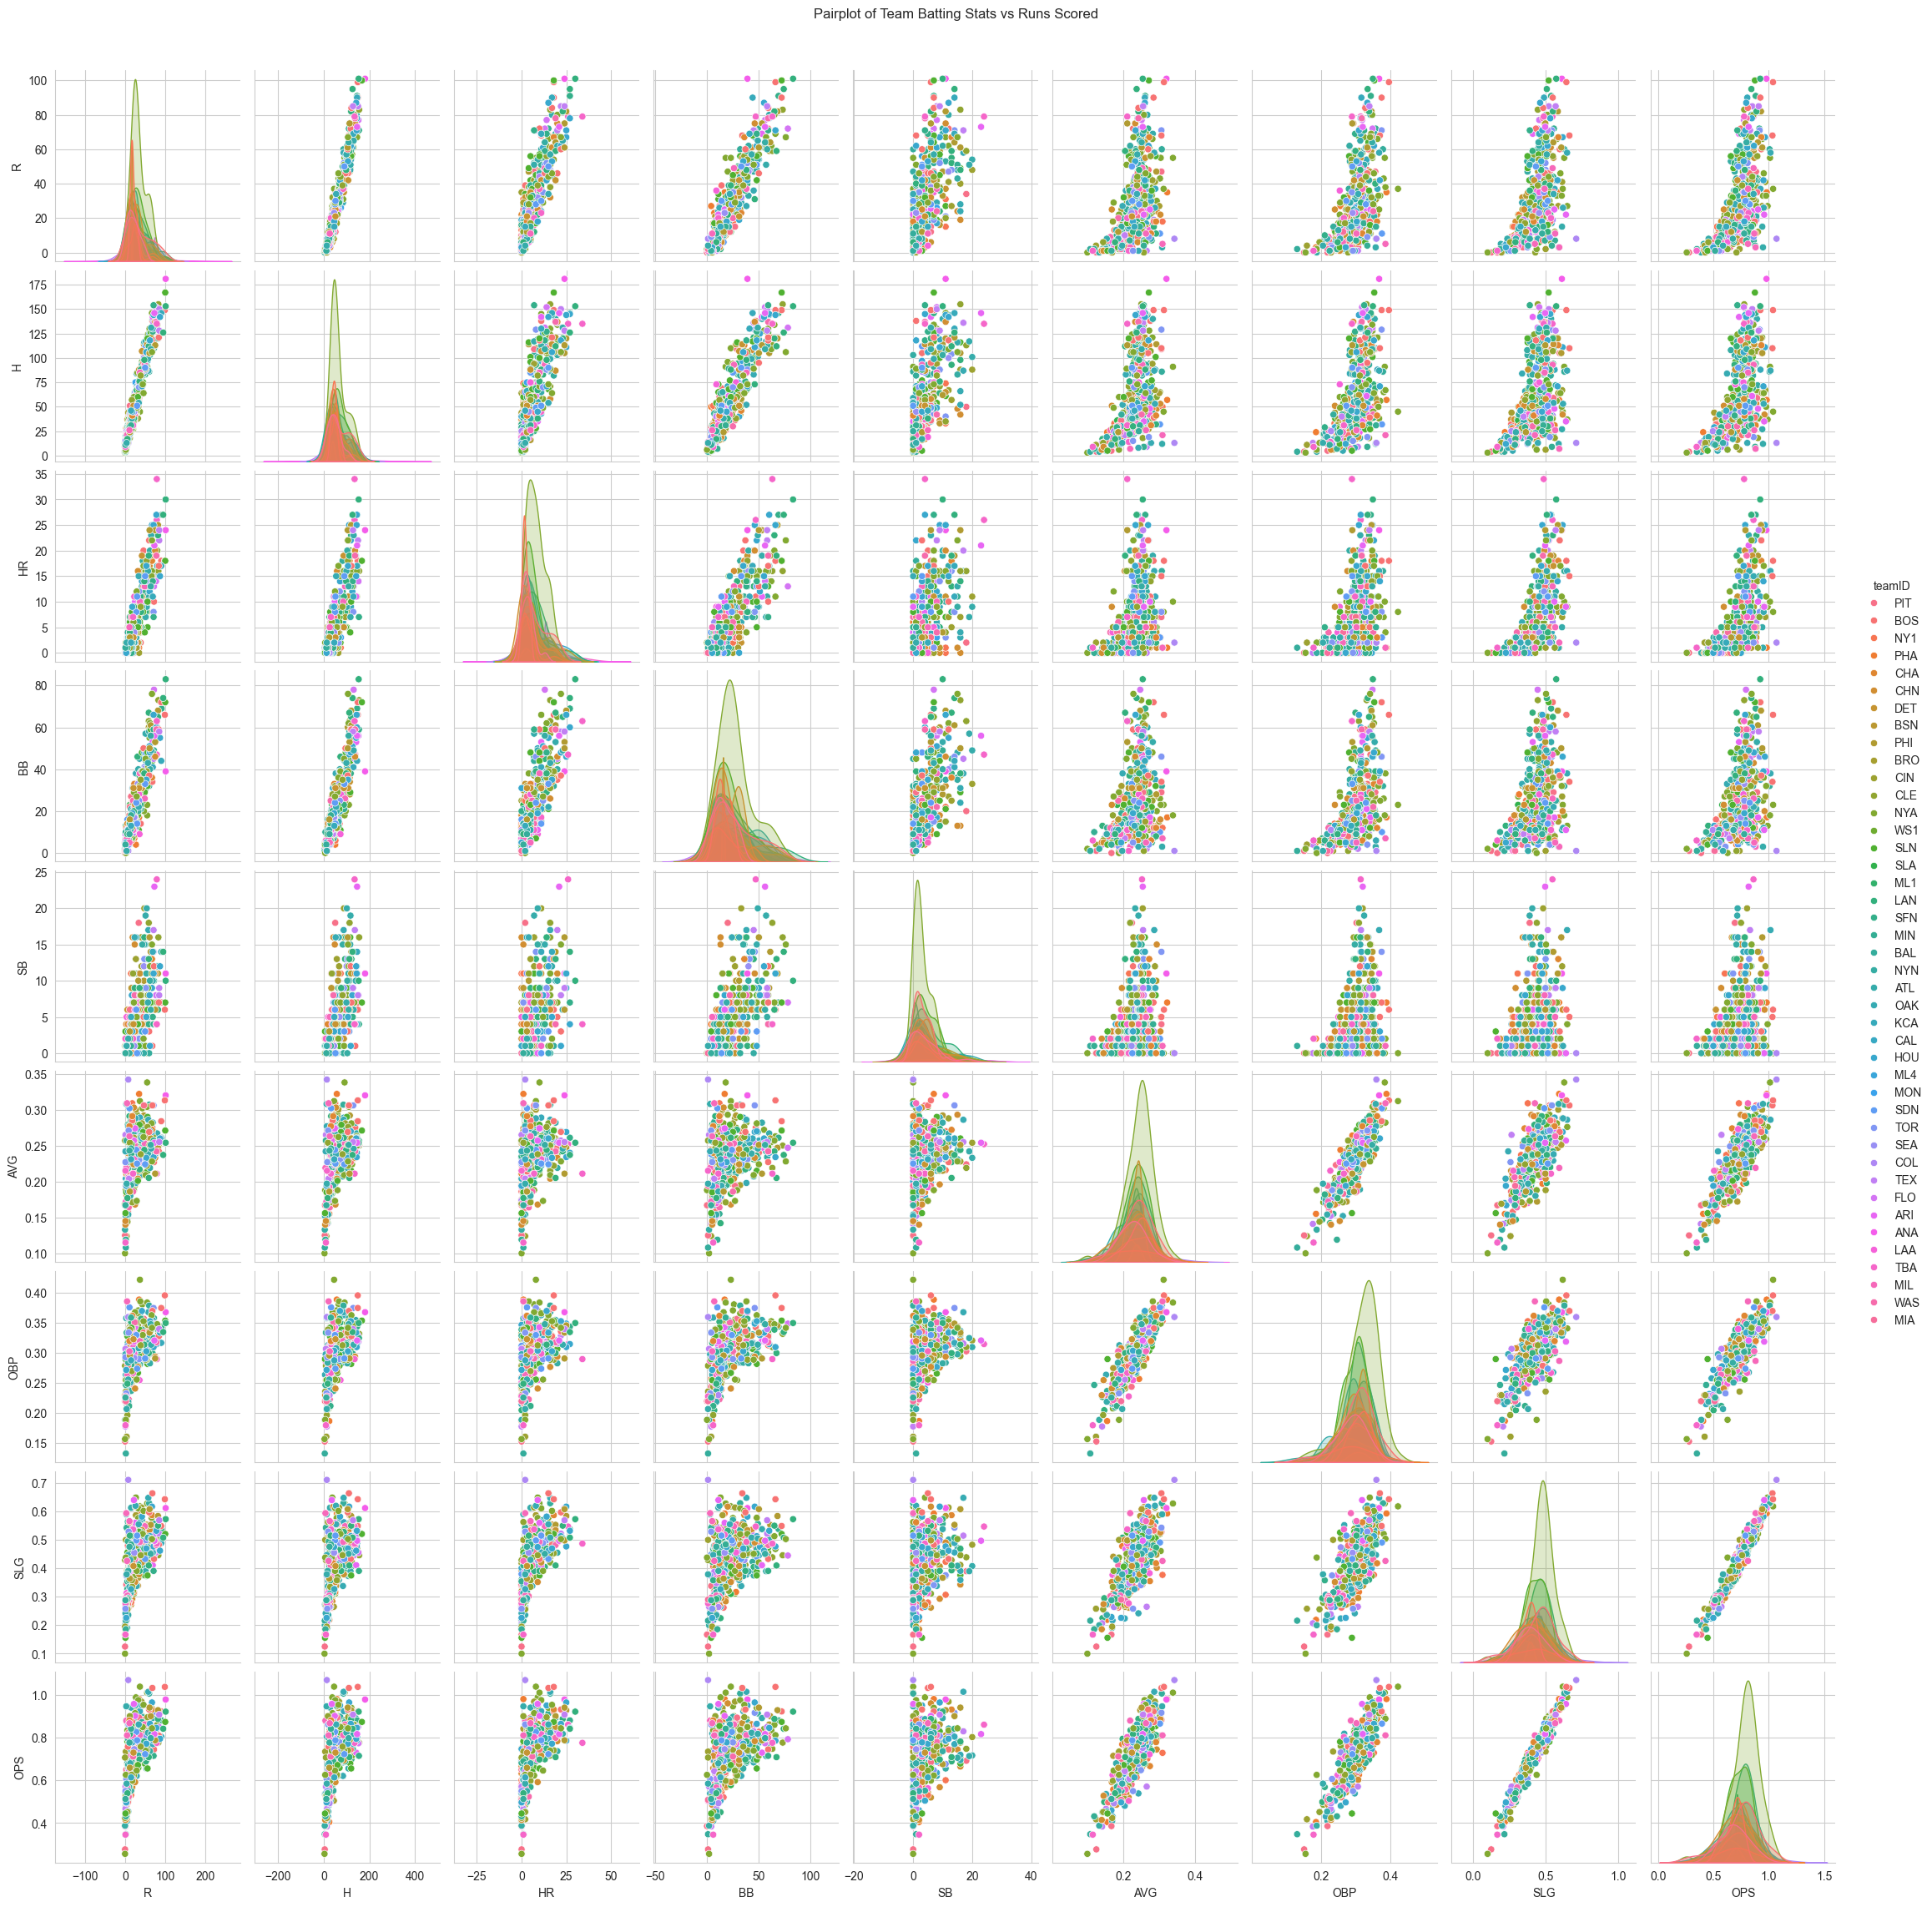

In [30]:
# Runs are the currency of baseball. Let's see some correlations between runs and other stats.
sns.pairplot(data = team_batting_post, vars = ['R', 'H', 'HR', 'BB', 'SB', 'AVG', 'OBP', 'SLG', 'OPS'], hue = 'teamID')
plt.suptitle('Pairplot of Team Batting Stats vs Runs Scored', y=1.02)
plt.show()

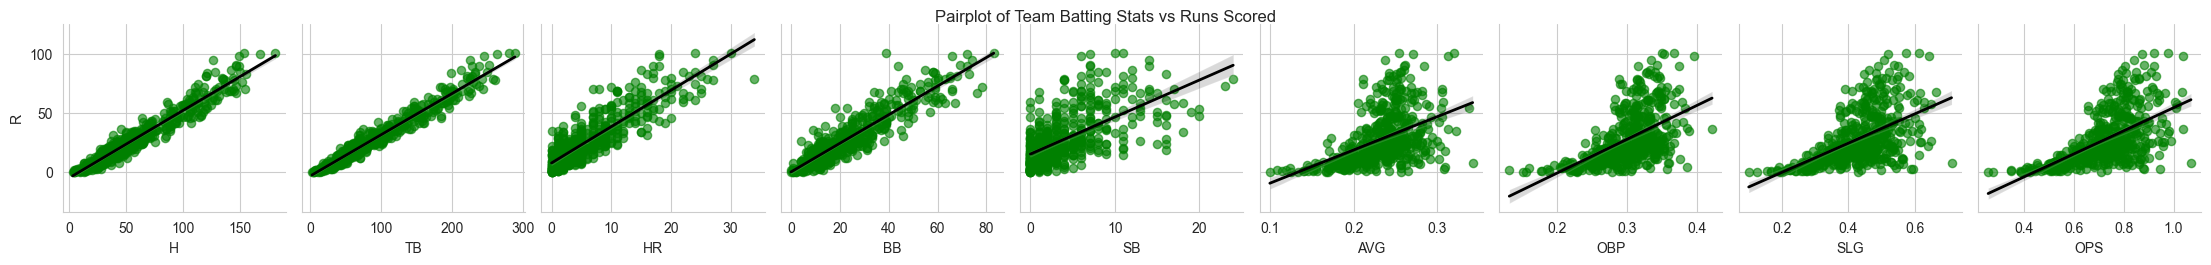

In [31]:
# That was really pretty. But it's too much. I want to concentrate of the correlation of runs with other stats.
sns.pairplot(
    data=team_batting_post,
    x_vars=['H', 'TB', 'HR', 'BB', 'SB', 'AVG', 'OBP', 'SLG', 'OPS'],
    y_vars='R',
    kind='reg',
    plot_kws={
        'scatter_kws': {'alpha': 0.6, 's': 35, "color": "green"},
        'line_kws': {'linewidth': 2, 'color': 'black'}
    }
)
plt.suptitle('Pairplot of Team Batting Stats vs Runs Scored', y=1.02)
plt.show()

In [32]:
# Let's see which stats have the higest correlation with runs scored.
correlation_matrix = team_batting_post[['R', 'H', 'HR', 'BB', 'SB', 'TB', 'AVG', 'OBP', 'SLG', 'OPS']].corr()
correlation_matrix['R'].sort_values(ascending=False)


R      1.000000
TB     0.977771
H      0.966377
BB     0.916701
HR     0.868007
SB     0.621239
OPS    0.578031
SLG    0.546629
OBP    0.538174
AVG    0.473371
Name: R, dtype: float64

In [33]:
# It may be worth breaking up the data into different rounds of the postseason to see if there are different trends.
series_post['round'].value_counts()

round
WS       127
ALCS      55
NLCS      55
ALDS1     30
NLDS1     30
ALDS2     30
NLDS2     30
ALWC       9
NLWC       9
ALWC1      4
ALWC2      4
NLWC1      4
NLWC2      4
NEDIV      1
AWDIV      1
NWDIV      1
AEDIV      1
CS         1
ALWC3      1
ALWC4      1
NLWC3      1
NLWC4      1
Name: count, dtype: int64

In [34]:
world_series = series_post[(series_post['round']=='WS') & (series_post['yearID']>= 1903)]
world_series.head()

,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
8,1903,WS,BOS,AL,PIT,NL,5,3,0
9,1905,WS,NY1,NL,PHA,AL,4,1,0
10,1906,WS,CHA,AL,CHN,NL,4,2,0
11,1907,WS,CHN,NL,DET,AL,4,0,0
12,1908,WS,CHN,NL,DET,AL,4,1,0


In [35]:
Championhip_series = series_post[(series_post['round'].str.contains('CS'))]
Championhip_series.head()

,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
7,1892,CS,BSN,NL,CL4,NL,5,0,1
73,1969,ALCS,BAL,AL,MIN,AL,3,0,0
74,1969,NLCS,NYN,NL,ATL,NL,3,0,0
76,1970,ALCS,BAL,AL,MIN,AL,3,0,0
77,1970,NLCS,CIN,NL,PIT,NL,3,0,0


In [36]:
division_series = series_post[(series_post['round'].str.contains('DS'))]
division_series.head()

,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
152,1995,ALDS1,CLE,AL,BOS,AL,3,0,0
153,1995,ALDS2,SEA,AL,NYA,AL,3,2,0
154,1995,NLDS1,ATL,NL,COL,NL,3,1,0
155,1995,NLDS2,CIN,NL,LAN,NL,3,0,0
159,1996,ALDS1,BAL,AL,CLE,AL,3,1,0


In [37]:
Wild_card_series = series_post[(series_post['round'].str.contains('WC'))]
Wild_card_series.head()

,yearID,round,teamIDwinner,lgIDwinner,teamIDloser,lgIDloser,wins,losses,ties
271,2012,ALWC,BAL,AL,TEX,AL,1,0,0
272,2012,NLWC,SLN,NL,ATL,NL,1,0,0
280,2013,ALWC,TBA,AL,CLE,AL,1,0,0
281,2013,NLWC,PIT,NL,CIN,NL,1,0,0
289,2014,ALWC,KCA,AL,OAK,AL,1,0,0


I think my goal will be to clean my data in the pitching and defense categories. Then, I'll merge the tables and try to extract some trends from there.


## Cleaning the pitching data

Let's explore the pitchig data first.

In [38]:
pitching_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  6991 non-null   object 
 1   yearID    6991 non-null   int64  
 2   round     6991 non-null   object 
 3   teamID    6991 non-null   object 
 4   lgID      6991 non-null   object 
 5   W         6991 non-null   int64  
 6   L         6991 non-null   int64  
 7   G         6991 non-null   int64  
 8   GS        6991 non-null   int64  
 9   CG        6991 non-null   int64  
 10  SHO       6991 non-null   int64  
 11  SV        6991 non-null   int64  
 12  IPouts    6991 non-null   int64  
 13  H         6991 non-null   int64  
 14  ER        6991 non-null   int64  
 15  HR        6991 non-null   int64  
 16  BB        6991 non-null   int64  
 17  SO        6991 non-null   int64  
 18  BAOpp     6918 non-null   float64
 19  ERA       6918 non-null   float64
 20  IBB       6941 non-null   floa

In [39]:
pitching_post.describe()

,yearID,W,L,G,GS,CG,SHO,SV,IPouts,H,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,...,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6991.000000,6991.000000,6941.000000,6941.000000,6941.000000
mean,1996.374052,0.269346,0.269346,1.903018,0.540409,0.094550,0.020455,0.104706,14.501931,4.368617,...,0.180810,0.143207,0.159343,0.011382,19.875666,0.445859,2.174224,0.212649,0.113240,0.341305
std,27.723788,0.528964,0.507430,1.015632,0.769625,0.415456,0.148466,0.406555,14.055519,4.406054,...,0.459307,0.410182,0.416477,0.106084,17.306075,0.807623,2.596680,0.545103,0.345618,0.654011
min,1884.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1986.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2005.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2016.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,19.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,26.000000,1.000000,3.000000,0.000000,0.000000,1.000000
max,2024.000000,4.000000,4.000000,8.000000,8.000000,8.000000,3.000000,4.000000,213.000000,64.000000,...,4.000000,5.000000,4.000000,1.000000,178.000000,6.000000,36.000000,7.000000,3.000000,6.000000


In [40]:
pitching_post.isna().sum()

playerID     0
yearID       0
round        0
teamID       0
lgID         0
W            0
L            0
G            0
GS           0
CG           0
SHO          0
SV           0
IPouts       0
H            0
ER           0
HR           0
BB           0
SO           0
BAOpp       73
ERA         73
IBB         50
WP          50
HBP         50
BK          50
BFP         50
GF           0
R            0
SH          50
SF          50
GIDP        50
dtype: int64

In [45]:
pitching_post[pitching_post['BAOpp'].isna()][['playerID', 'yearID', 'IPouts', 'BAOpp']]

,playerID,yearID,IPouts,BAOpp
41,agostju01,1983,1,NaN
252,baldwla01,1887,126,NaN
314,becanbu01,1884,18,NaN
865,carutbo01,1885,78,NaN
866,carutbo01,1886,78,NaN
...,...,...,...,...
6667,welchmi01,1888,51,NaN
6668,welchmi01,1889,15,NaN
6773,willine01,1886,6,NaN
6953,youngcy01,1892,81,NaN


In [46]:
#I think it's reasonable to assume that if a pitcher has 0 outs recorded, they did not face any batters, and thus have no batting average against.
pitching_post['BAOpp'].fillna(0.000, inplace=True)
pitching_post.isna().sum()

/var/folders/kz/2037kb4n7zg50nhsp_pgt59h0000gn/T/ipykernel_39208/1871264549.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pitching_post['BAOpp'].fillna(0.000, inplace=True)


playerID     0
yearID       0
round        0
teamID       0
lgID         0
W            0
L            0
G            0
GS           0
CG           0
SHO          0
SV           0
IPouts       0
H            0
ER           0
HR           0
BB           0
SO           0
BAOpp        0
ERA         73
IBB         50
WP          50
HBP         50
BK          50
BFP         50
GF           0
R            0
SH          50
SF          50
GIDP        50
dtype: int64

In [48]:
pitching_post[(pitching_post['ERA'].isna()) & (pitching_post['ER'] > 0)][['playerID', 'yearID', 'ER', 'ERA']]

,playerID,yearID,ER,ERA
169,ashbyaa01,2024,2,NaN
287,bassan01,2022,3,NaN
826,carlete01,1938,2,NaN
857,carrido01,1971,3,NaN
980,choatra01,2014,1,NaN
990,chrisru01,1948,1,NaN
1054,clevimi01,2022,3,NaN
1309,daviswa01,2018,2,NaN
1672,fieldjo03,2017,2,NaN
1835,fultzaa01,2002,1,NaN


In [50]:
# There are columns where pitchers have allowed earned runs but have no ERA recorded. Let's calculate those values.
pitching_post.loc[(pitching_post['ERA'].isna()) & (pitching_post['ER'] >= 0), 'ERA'] = ((pitching_post['ER'] * 9) / (pitching_post['IPouts'] / 3)).round(2)
pitching_post.isna().sum()

playerID     0
yearID       0
round        0
teamID       0
lgID         0
W            0
L            0
G            0
GS           0
CG           0
SHO          0
SV           0
IPouts       0
H            0
ER           0
HR           0
BB           0
SO           0
BAOpp        0
ERA         35
IBB         50
WP          50
HBP         50
BK          50
BFP         50
GF           0
R            0
SH          50
SF          50
GIDP        50
dtype: int64

In [54]:
pitching_post[pitching_post['ERA'].isna()][['playerID', 'yearID', 'IPouts', 'ER', 'ERA']]

,playerID,yearID,IPouts,ER,ERA
291,bastaan01,2009,0,0,NaN
605,breuema01,1942,0,0,NaN
984,chrisja01,2003,0,0,NaN
1492,durbich01,2012,0,0,NaN
1606,eyresc01,2007,0,0,NaN
1620,fairbpe01,2022,0,0,NaN
1804,freemsa01,2014,0,0,NaN
1837,fultzaa01,2007,0,0,NaN
1926,garream01,2020,0,0,NaN
2269,halldi01,1969,0,0,NaN


In [55]:
# The rest of the ERA NaN values are likely from pitchers who did not allow any earned runs. Let's fill those in with 0.00
pitching_post['ERA'].fillna(0.00, inplace=True)
pitching_post.isna().sum()

/var/folders/kz/2037kb4n7zg50nhsp_pgt59h0000gn/T/ipykernel_39208/196270898.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pitching_post['ERA'].fillna(0.00, inplace=True)


playerID     0
yearID       0
round        0
teamID       0
lgID         0
W            0
L            0
G            0
GS           0
CG           0
SHO          0
SV           0
IPouts       0
H            0
ER           0
HR           0
BB           0
SO           0
BAOpp        0
ERA          0
IBB         50
WP          50
HBP         50
BK          50
BFP         50
GF           0
R            0
SH          50
SF          50
GIDP        50
dtype: int64

In [56]:
# This might be super inefficient, but I want to look at all the remaining NaN values at the same time to see if there's anything else that needs to be addressed.
pitching_post[pitching_post.isna().any(axis=1)]

,playerID,yearID,round,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
252,baldwla01,1887,WS,DTN,NL,4,1,5,5,5,...,NaN,NaN,NaN,NaN,NaN,0,16,NaN,NaN,NaN
314,becanbu01,1884,WS,NY4,AA,0,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,0,12,NaN,NaN,NaN
865,carutbo01,1885,WS,SL4,AA,1,1,3,3,3,...,NaN,NaN,NaN,NaN,NaN,0,18,NaN,NaN,NaN
866,carutbo01,1886,WS,SL4,AA,2,1,3,3,3,...,NaN,NaN,NaN,NaN,NaN,0,14,NaN,NaN,NaN
867,carutbo01,1887,WS,SL4,AA,4,4,8,8,8,...,NaN,NaN,NaN,NaN,NaN,0,29,NaN,NaN,NaN
868,carutbo01,1889,WS,BR3,AA,0,2,4,2,2,...,NaN,NaN,NaN,NaN,NaN,2,19,NaN,NaN,NaN
919,chambel01,1888,WS,SL4,AA,2,3,5,5,5,...,NaN,NaN,NaN,NaN,NaN,0,36,NaN,NaN,NaN
1006,clarkjo01,1885,WS,CHN,NL,0,1,2,2,2,...,NaN,NaN,NaN,NaN,NaN,0,14,NaN,NaN,NaN
1007,clarkjo01,1886,WS,CHN,NL,2,2,4,4,3,...,NaN,NaN,NaN,NaN,NaN,0,15,NaN,NaN,NaN
1008,clarkjo01,1892,CS,CL4,NL,0,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,0,16,NaN,NaN,NaN


In [57]:
# For IBB, it's likely due to bad recordkeeping. Let's check the values. SABR says that IBB data was not consistently recorded until the 1950s.
pitching_post['IBB'].value_counts(dropna=False)

IBB
0.0    5873
1.0     908
2.0     137
NaN      50
3.0      19
4.0       4
Name: count, dtype: int64

In [58]:
pitching_post[(pitching_post['IBB'].isna()) & pitching_post['yearID'] > 1900]

,playerID,yearID,round,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP


In [59]:
# I feel comfortable filling the IBB NaN values with 0 since it's likely that the data was not recorded. For that matter, I feel pretty comfortable filling all remaining NaN values with 0.

pitching_post.fillna(0, inplace=True)
pitching_post.isna().sum()

playerID    0
yearID      0
round       0
teamID      0
lgID        0
W           0
L           0
G           0
GS          0
CG          0
SHO         0
SV          0
IPouts      0
H           0
ER          0
HR          0
BB          0
SO          0
BAOpp       0
ERA         0
IBB         0
WP          0
HBP         0
BK          0
BFP         0
GF          0
R           0
SH          0
SF          0
GIDP        0
dtype: int64

In [60]:
# Reviewing the cleaned dataset.
pitching_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  6991 non-null   object 
 1   yearID    6991 non-null   int64  
 2   round     6991 non-null   object 
 3   teamID    6991 non-null   object 
 4   lgID      6991 non-null   object 
 5   W         6991 non-null   int64  
 6   L         6991 non-null   int64  
 7   G         6991 non-null   int64  
 8   GS        6991 non-null   int64  
 9   CG        6991 non-null   int64  
 10  SHO       6991 non-null   int64  
 11  SV        6991 non-null   int64  
 12  IPouts    6991 non-null   int64  
 13  H         6991 non-null   int64  
 14  ER        6991 non-null   int64  
 15  HR        6991 non-null   int64  
 16  BB        6991 non-null   int64  
 17  SO        6991 non-null   int64  
 18  BAOpp     6991 non-null   float64
 19  ERA       6991 non-null   float64
 20  IBB       6991 non-null   floa

In [62]:
# There are several columns that need to  have their data types changed to integers.
int_columns_pitching = ['IBB', 'WP', 'HBP', 'BK', 'ER', 'SH', 'SF', 'BFP', 'GIDP']
pitching_post[int_columns_pitching] = pitching_post[int_columns_pitching].astype(int)
pitching_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  6991 non-null   object 
 1   yearID    6991 non-null   int64  
 2   round     6991 non-null   object 
 3   teamID    6991 non-null   object 
 4   lgID      6991 non-null   object 
 5   W         6991 non-null   int64  
 6   L         6991 non-null   int64  
 7   G         6991 non-null   int64  
 8   GS        6991 non-null   int64  
 9   CG        6991 non-null   int64  
 10  SHO       6991 non-null   int64  
 11  SV        6991 non-null   int64  
 12  IPouts    6991 non-null   int64  
 13  H         6991 non-null   int64  
 14  ER        6991 non-null   int64  
 15  HR        6991 non-null   int64  
 16  BB        6991 non-null   int64  
 17  SO        6991 non-null   int64  
 18  BAOpp     6991 non-null   float64
 19  ERA       6991 non-null   float64
 20  IBB       6991 non-null   int6

In [63]:
# I think all the pitching data is clean now. Let's clean up the fielding dataset next.
fielding_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16502 entries, 0 to 16501
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  16502 non-null  object 
 1   yearID    16502 non-null  int64  
 2   teamID    16502 non-null  object 
 3   lgID      16502 non-null  object 
 4   round     16502 non-null  object 
 5   POS       16502 non-null  object 
 6   G         16502 non-null  int64  
 7   GS        16502 non-null  int64  
 8   InnOuts   16502 non-null  int64  
 9   PO        16502 non-null  int64  
 10  A         16502 non-null  int64  
 11  E         16502 non-null  int64  
 12  DP        16502 non-null  int64  
 13  TP        16039 non-null  float64
 14  PB        1266 non-null   float64
 15  SB        64 non-null     float64
 16  CS        64 non-null     float64
dtypes: float64(4), int64(8), object(5)
memory usage: 2.1+ MB


In [65]:
fielding_post.isna().sum()

playerID        0
yearID          0
teamID          0
lgID            0
round           0
POS             0
G               0
GS              0
InnOuts         0
PO              0
A               0
E               0
DP              0
TP            463
PB          15236
SB          16438
CS          16438
dtype: int64

In [67]:
len(fielding_post)

16502